# Testing

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Persamaan Metrik Akurasi Skor-Q
$$Q_s =  \frac{∑^s_{i=1} C_i}{n}×100\%$$

Di mana:
- $C_i$ = Jumlah residu yang terprediksi dengan benar
- $n$ = Jumlah residu yang terprediksi
- $s$ = Jumlah State yang ada (8 state atau 3 state)

## Akurasi Q8 

In [2]:
def get_test_data(dataset_name):
    """
    Retrieve the prediction and test data for a given dataset. 
    """
    df = pd.read_csv(f"../Data/Postprocessed/{dataset_name}_dssp.csv")
    dataset_name = dataset_name.upper()
    df_test = pd.read_csv(f"../Data/Preprocessed/{dataset_name}_preprocessed.csv")
    return df, df_test

In [3]:
# Get the data for testing
df_cb513, df_test_cb513 = get_test_data('cb513')

In [4]:
df_cb513.head()

,id,length,residue,predicted_dssp8
0,0,67,VPSLATISLENSWSGLSKQIQLAQGNNGIFRTPIVLVDNKGNRVQI...,---HHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEEE-TTS-EEEE...
1,1,87,MFKVYGYDSNIHKCVYCDNAKRLLTVKKQPFEFINIMPEKGVFDDE...,-EEEEE--TTTS--HHHHHHHHHHHHTT--EEEEES-SBTTB--HH...
2,2,449,TPEMPVLENRAAQGNITAPGGARRLTGDQTAALRNSLSDKPAKNII...,--SS---S--S--S-TTSTTTT-S-SS--HHHHHHT---SPPSEEE...
3,3,108,APAFSVSPASGASDGQSVSVSVAAAGETYYIAQCAPVGGQDACNPA...,--EEEEES-SSBPTT-EEEEEEE--SSEEEEEEEEEETTEEEE-TT...
4,4,349,TPAFNKPKVELHVHLDGAIKPETILYFGKKRGIALPADTVEELRNI...,--S--S-EEEEEEESTTS--HHHHHHHHHHHT---S-SSHHHHHHH...


In [5]:
df_test_cb513

,id,length,residue,dssp8,dssp3
0,0,67,VPSLATISLENSWSGLSKQIQLAQGNNGIFRTPIVLVDNKGNRVQI...,LLLHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEELLSSSSLEEE...,CCCHHHHHHHHHHHHHHHHHHHHCCCCCEEEEEEEECCCCCCCEEE...
1,1,87,MFKVYGYDSNIHKCVYCDNAKRLLTVKKQPFEFINIMPEKGVFDDE...,LEEEEELLTTTSLLHHHHHHHHHHHHTTLLEEEEESLSBTTBLLHH...,CEEEEECCCCCCCCHHHHHHHHHHHHCCCCEEEEECCCECCECCHH...
2,2,449,TPEMPVLENRAAQGNITAPGGARRLTGDQTAALRNSLSDKPAKNII...,LLLLLLLLLLSLLSLTTSTTTTLLLSSLLHHHHHHHLLLSLLSEEE...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHCCCCCCCEEE...
3,3,108,APAFSVSPASGASDGQSVSVSVAAAGETYYIAQCAPVGGQDACNPA...,LLEEEEELLSSLLSSLEEEEEEESLLSEEEEEEELEETTEELLLTT...,CCEEEEECCCCCCCCCEEEEEEECCCCEEEEEEECEECCEECCCCC...
4,4,349,TPAFNKPKVELHVHLDGAIKPETILYFGKKRGIALPADTVEELRNI...,LLSLLSLEEEEEEEGGGSLLHHHHHHHHHHHTLLLSLSSHHHHHHH...,CCCCCCCEEEEEEEHHHCCCHHHHHHHHHHHCCCCCCCCHHHHHHH...
...,...,...,...,...,...
509,509,171,XRCGEQGSNMECPNNLCCSQYGYCGMGGDYCGKGCQNGACWTSKRC...,LLLBGGGTTBLLGGGLEELTTSLEELSHHHHSTTLLSSSLSSLLBL...,CCCEHHHCCECCHHHCEECCCCCEECCHHHHCCCCCCCCCCCCCEC...
510,510,211,MYGNWGRFIRVNLSTGDIKVEEYDEELAKKWLGSRGLAIYLLLKEM...,LLSSLSEEEEEETTTTEEEEEELLHHHHHHHLSHHHHHHHHHHHHS...,CCCCCCEEEEEECCCCEEEEEECCHHHHHHHCCHHHHHHHHHHHHC...
511,511,291,MPPITQQATVTAWLPQVDASQITGTISSLESFTNRFYTTTSGAQAS...,LLLLLLHHHHHHHGGGLLHHHHHHHHHHHHTSSLLLTTSHHHHHHH...,CCCCCCHHHHHHHHHHCCHHHHHHHHHHHHCCCCCCCCCHHHHHHH...
512,512,700,XRAKVAMSHFEPHEYIRYDLLEKNIDIVRKRLNRPLTLSEKIVYGH...,LLSLLBSLSSLTTSBLLHHHHHHHHHHHHHHHLSLLLHHHHHHHTT...,CCCCCECCCCCCCCECCHHHHHHHHHHHHHHHCCCCCHHHHHHHCC...


| Code | Structure                     |
|------|-------------------------------|
| H    | Alpha helix (4-12)            |
| B    | Isolated beta-bridge residue  |
| E    | Strand                        |
| G    | 3-10 helix                    |
| I    | Pi helix                      |
| T    | Turn                          |
| S    | Bend                          |
| C    | Coil                          | 

- Some dataset may use different code for the last structure, such as space '' or 'L', but in this case we use 'C'
- DSSP version 4 predicts can predict P state but it is not used in this case, so we convert it to 'C' because it is not a common structure https://chatgpt.com/share/681d8142-dd3c-8005-a045-f54247344b66

In [6]:
# Standarkan format struktur sekunder prediksi menggunakan regex
df_cb513['predicted_dssp8'] = df_cb513['predicted_dssp8'].str.replace('-', 'C', regex=True)
df_cb513['predicted_dssp8'] = df_cb513['predicted_dssp8'].str.replace('P', 'C', regex=True)

In [7]:
# Standarkan format struktur sekunder prediksi menggunakan regex
df_test_cb513['dssp8'] = df_test_cb513['dssp8'].str.replace('L', 'C', regex=True)

In [18]:
# Merge the two DataFrames on the 'id' column
df_merged = pd.merge(df_cb513, df_test_cb513, on='id', suffixes=('_predicted', '_actual'))

df_merged[['dssp8', 'predicted_dssp8']]

,dssp8,predicted_dssp8
0,CCCHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEECCSSSSCEEE...,CCCHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEEECTTSCEEEE...
1,CEEEEECCTTTSCCHHHHHHHHHHHHTTCCEEEEESCSBTTBCCHH...,CEEEEECCTTTSCCHHHHHHHHHHHHTTCCEEEEESCSBTTBCCHH...
2,CCCCCCCCCCSCCSCTTSTTTTCCCSSCCHHHHHHHCCCSCCSEEE...,CCSSCCCSCCSCCSCTTSTTTTCSCSSCCHHHHHHTCCCSCCSEEE...
3,CCEEEEECCSSCCSSCEEEEEEESCCSEEEEEEECEETTEECCCTT...,CCEEEEESCSSBCTTCEEEEEEECCSSEEEEEEEEEETTEEEECTT...
4,CCSCCSCEEEEEEEGGGSCCHHHHHHHHHHHTCCCSCSSHHHHHHH...,CCSCCSCEEEEEEESTTSCCHHHHHHHHHHHTCCCSCSSHHHHHHH...
...,...,...
503,CCSSCCCTHHHHHHHHHHHGGGCBCCCTTC,CCCSCCCTTHHHHHHHHHHHHTCSSCCCCC
504,CCSCEETTTTTCCCCCCBCCSSBCHHHHHHHHHHHHHHHHHHSCCC...,CCSCEETTTTTCCCCCCBCTTSBCHHHHHHHHHHHHHHHHHHSCCC...
505,CCSSCSEEEEEETTTTEEEEEECCHHHHHHHCSHHHHHHHHHHHHS...,CCSCCSEEEEEETTTCCEEEEECCHHHHHHHCSTHHHHHHHHHHHS...
506,CCCCCCHHHHHHHGGGCCHHHHHHHHHHHHTSSCCCTTSHHHHHHH...,CCCCCCHHHHHHHGGGCCHHHHHHHHHHHHTSSCCCTTSHHHHHHH...


# Metrik Akurasi skor-Q (Q Average)
$$Q_{avg} = \frac{\sum{Q_s}}{n_{protein}}$$

Penjelasan:
- $Q_{avg}$ = Akurasi skor-Q rata-rata dari semua protein
- $Q_s$ = Akurasi skor-Q dari setiap protein
- $n_{protein}$ = Jumlah protein yang diuji

In [9]:
def calculate_q_score(predicted, actual):
    """
    Menghitung Q_s untuk satu protein.
    
    Args:
        predicted (str): Struktur sekunder yang diprediksi.
        actual (str): Struktur sekunder yang sebenarnya.
    
    Returns:
        float: Nilai Q_s dalam persen.
    """
    correct = sum(1 for p, a in zip(predicted, actual) if p == a)
    total = len(actual)
    return (correct / total) * 100 if total > 0 else 0


def calculate_q_average(predicted_list, actual_list):
    """
    Menghitung Q_avg untuk semua protein dalam dataset.
    
    Args:
        predicted_list (list of str): Daftar struktur sekunder yang diprediksi.
        actual_list (list of str): Daftar struktur sekunder yang sebenarnya.
    
    Returns:
        float: Nilai Q_avg dalam persen.
    """
    q_scores = [calculate_q_score(predicted, actual) for predicted, actual in zip(predicted_list, actual_list)]
    return sum(q_scores) / len(q_scores) if q_scores else 0

## Akurasi Q8

In [19]:
predicted_list = df_merged['predicted_dssp8'].tolist()  # Struktur sekunder yang diprediksi
actual_list = df_merged['dssp8'].tolist()  # Struktur sekunder yang sebenarnya

q8_avg = calculate_q_average(predicted_list, actual_list)
print(f"Q8_avg: {q8_avg:.2f}%")

Q8_avg: 88.69%


## Visualisasi Prediksi Protein Pertama (8-State)

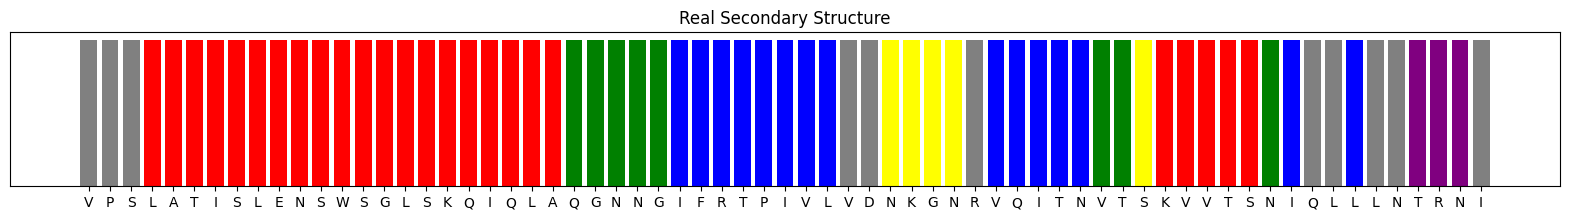

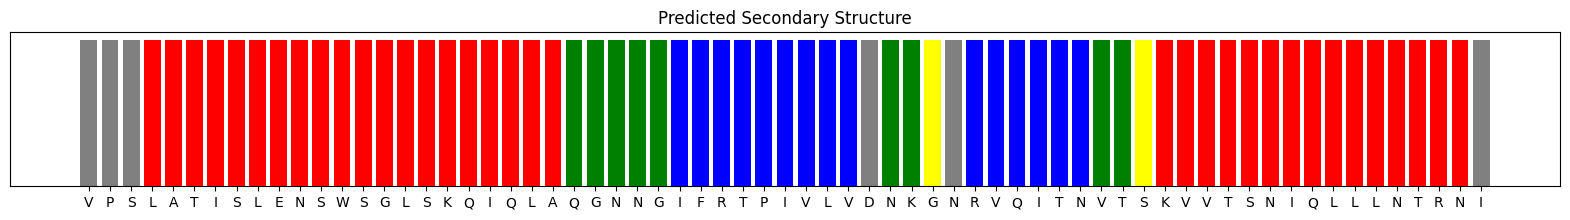

In [21]:
# Get the residue of the first protein
residu = df_cb513['residue'].iloc[0]

# Get the first protein's dssp8 predicted and actual secondary structure
predicted_ss = df_merged['predicted_dssp8'].iloc[0]
actual_ss = df_merged['dssp8'].iloc[0]

# Define colors for secondary structure elements using 8-state DSSP
colors = {'H': 'red', 'B': 'blue', 'E': 'blue', 'G': 'purple', 'I': 'orange', 'T': 'green', 'S': 'yellow', 'C': 'gray'}
# Plot
fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(actual_ss)), [1]*len(actual_ss), color=[colors[ss] for ss in actual_ss])
ax.set_xticks(range(len(actual_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Real Secondary Structure")

fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(predicted_ss)), [1]*len(predicted_ss), color=[colors[predicted_ss] for predicted_ss in predicted_ss])
ax.set_xticks(range(len(predicted_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Predicted Secondary Structure")

plt.show()

In [22]:
# Akurasi Q8 protein pertama
q8_first_protein = calculate_q_score(predicted_ss, actual_ss)
print(f"Q8 for the first protein: {q8_first_protein:.2f}%")

Q8 for the first protein: 77.61%


## Akurasi Q3

Tabel Konversi Q8 ke Q3
| DSSP 8-Class | 3-Class |
|--------------|---------|
| H            | H       |
| G            | H       |
| I            | H       |
| B            | E       |
| E            | E       |
| T            | C       |
| S            | C       |
| C            | C       |

In [23]:
# Convert the original & predicted 8-state secondary structure to 3-state secondary structure
def convert_8state_to_3state(ss):
    ss_3state = ""
    for s in ss:
        if s in ['H', 'G', 'I']:
            ss_3state += 'H'
        elif s in ['E', 'B']:
            ss_3state += 'E'
        else:
            ss_3state += 'C'
    return ss_3state

In [24]:
predicted_list_3state = [convert_8state_to_3state(ss) for ss in predicted_list]
actual_list_3state = [convert_8state_to_3state(ss) for ss in actual_list]

In [25]:
# Akurasi Q3 Rata-rata
q3_avg = calculate_q_average(predicted_list_3state, actual_list_3state)
print(f"Q3_avg: {q3_avg:.2f}%")

Q3_avg: 93.42%


# Visualisasi Prediksi Protein Pertama (3-State)

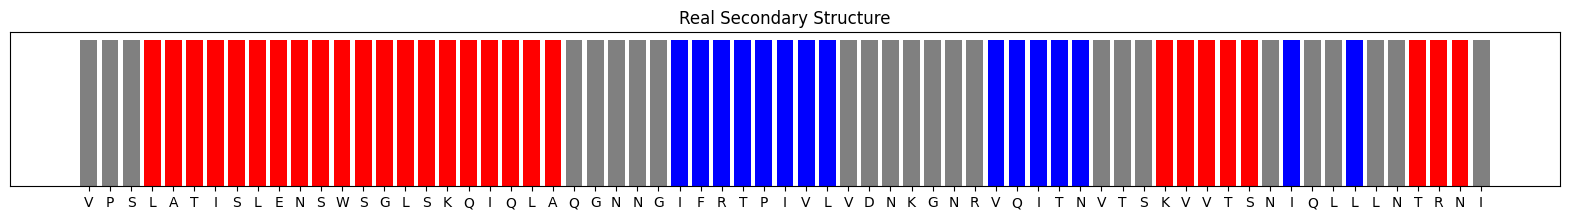

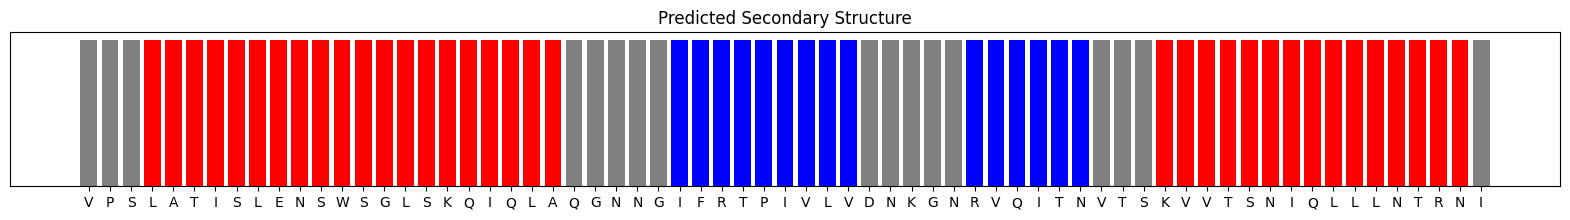

In [26]:
# Get the residue of the first protein
residu = df_cb513['residue'].iloc[0]

# Get the first protein's dssp3 predicted and actual secondary structure
predicted_ss = predicted_list_3state[0]
actual_ss = actual_list_3state[0]

# Define colors for secondary structure elements using 3-state DSSP
colors = {'H': 'red', 'E': 'blue', 'C': 'gray'}

# Plot
fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(actual_ss)), [1]*len(actual_ss), color=[colors[ss] for ss in actual_ss])
ax.set_xticks(range(len(actual_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Real Secondary Structure")

fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(predicted_ss)), [1]*len(predicted_ss), color=[colors[predicted_ss] for predicted_ss in predicted_ss])
ax.set_xticks(range(len(predicted_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Predicted Secondary Structure")

plt.show()

In [27]:
# Akurasi Q3 protein pertama
q3 = calculate_q_score(predicted_ss, actual_ss)
print(f"Q3 for the first protein: {q3:.2f}%")

Q3 for the first protein: 86.57%


# Step 1: Analyze the Dataset
- Check the diversity of proteins in the dataset.
- Ensure the dataset is clean and free of errors.

# Step 2: Evaluate Protein Dynamics
- Identify proteins with high conformational flexibility.
- Highlight regions that are intrinsically disordered.

# Step 3: Assess Protein Complexes
- Check for protein complexes or interactions in the dataset.
- Evaluate multimeric structures.

# Step 4: Post-Translational Modifications
- Identify proteins with modifications like phosphorylation or glycosylation.
- Analyze their impact on structure prediction.

# Step 5: Benchmark Against Experimental Data
- Compare AlphaFold's predictions with experimental data.
- Highlight specific areas of deviation.

# Step 6: Analyze Prediction Errors
- Evaluate secondary structure predictions (e.g., Q8 and Q3 scores).
- Analyze deviations in the predicted 3D structure.

# Step 7: Visualize Predictions
- Use tools like PyMOL or Chimera to visualize predicted and actual structures.
- Highlight regions of significant deviation.

# Step 8: Refine the Model
- Apply additional physics-based refinement.
- Incorporate more diverse training data or additional features.